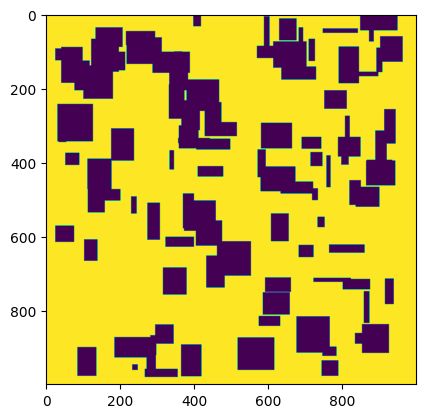

In [10]:
import matplotlib.pyplot as plt
from eval_metrics import cal_bend, cal_path_length
plt.imshow(plt.imread("./generated_images/o7_dense.png"))

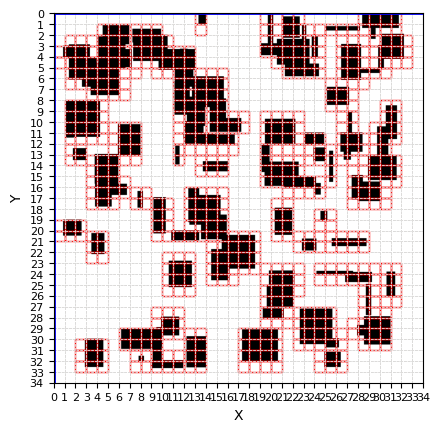

In [11]:
# Import necessary custom-built classes and methods
# from utils.obstacle_space import Map
from obstacle.obstacle_map import Map
from a_star.explorer import Explorer
from a_star.search import astar_search, path_states, dynamic_weighted_astar_search
import time

map = Map(image_path="./generated_images/o7_dense.png", grid_size=30)
map.draw_coordinate_system()

In [12]:
initial=(0,0)
goal=(map.x_lim - 1, map.y_lim -1)

# Initialize the explorer class
explorer = Explorer(map=map, initial=initial, goal=goal)
# Check validity of start and goal nodes

if map.is_obstacle_in_grid(initial[0], initial[1]):
    print('Start lie in obstacle space!!\nPlease try again')

if map.is_obstacle_in_grid(goal[0], goal[1]):
    print('Goal lie in obstacle space!!\nPlease try again')

Reached: 191
Elapsed Time: 0.016893863677978516 seconds
Bends:  19
Path length:  61.4558441227157


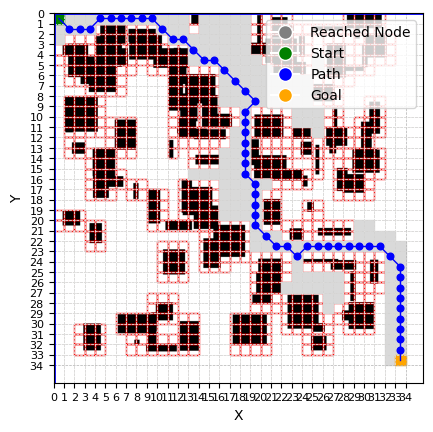

In [13]:
start_time = time.time()
node = astar_search(explorer)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Reached: {len(explorer.reached.keys())}")
print(f"Elapsed Time: {elapsed_time} seconds")
states = path_states(node)

print("Bends: ", cal_bend(states))
print("Path length: ", cal_path_length(states))

map.draw_path_found(states, initial, goal, explorer.get_reached())

Reached:  132
Elapsed Time: 0.006333112716674805 seconds
Bends:  19
Path length:  61.4558441227157


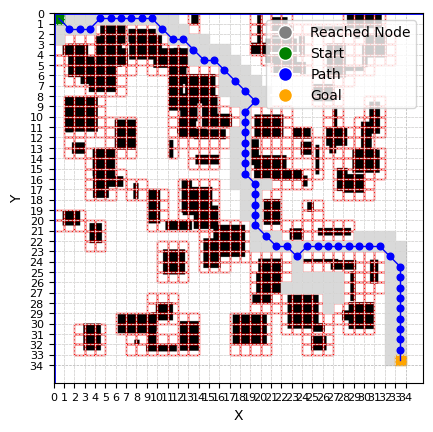

In [14]:
from math import sqrt
def h(node):
    h1 = abs(goal[0] - node.state[0])
    h2 = abs(goal[1] - node.state[1])
    return h1 + h2 + (sqrt(2) - 2) * min(h1, h2)

start_time = time.time()
node = dynamic_weighted_astar_search(explorer, h=h)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
path = path_states(node)

print("Reached: ", len(explorer.reached.keys()))
print(f"Elapsed Time: {elapsed_time} seconds")
print("Bends: ", cal_bend(path))
print("Path length: ", cal_path_length(path))
map.draw_path_found(path, initial, goal, explorer.get_reached())

In [15]:
from path_smooth.path_smooth import simplify_path
from math import sqrt
def h(node):
    h1 = abs(goal[0] - node.state[0])
    h2 = abs(goal[1] - node.state[1])
    return h1 + h2 + (sqrt(2) - 2) * min(h1, h2)

start_time = time.time()
node = dynamic_weighted_astar_search(explorer, h=h)
path = path_states(node)
simplified_path = simplify_path(path, map)
end_time = time.time()

print("Reached: ", len(explorer.reached.keys()))
print(f"Elapsed Time: {end_time - start_time} seconds")
print("Bends: ", cal_bend(simplified_path))
print("Path length: ", cal_path_length(simplified_path))


Reached:  132
Elapsed Time: 0.4922769069671631 seconds
Bends:  18
Path length:  57.46586583709616


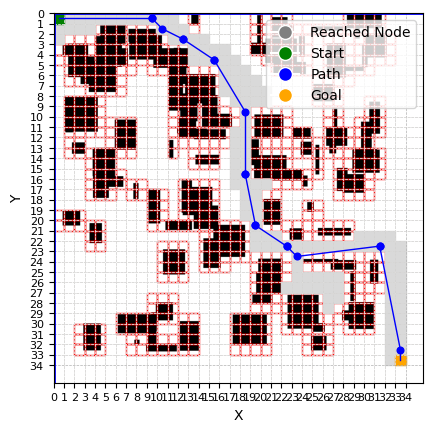

In [16]:
map.draw_path_found(simplified_path, initial, goal, explorer.get_reached())

**Genetic algorithm**

Finish Ant colony optimization, size of initial population:  9075
------------Generation 1 -----------------
Population size:  9075
Before selection, population size:  9075
After selection, population size:  8984
Before crossover, two first parents: 
[0, 35, 36, 3, 4, 5, 6, 7, 8, 9, 44, 79, 80, 115, 150, 151, 186, 220, 255, 290, 324, 358, 392, 426, 459, 494, 527, 562, 561, 596, 629, 664, 699, 734, 769, 770, 805, 772, 773, 774, 775, 776, 777, 778, 779, 814, 849, 882, 917, 951, 984, 1018, 1053, 1087, 1121, 1155]
[0, 35, 36, 3, 4, 5, 6, 7, 8, 9, 44, 79, 80, 115, 150, 116, 151, 186, 220, 255, 290, 324, 358, 392, 426, 459, 494, 527, 562, 596, 595, 629, 664, 699, 734, 769, 770, 805, 772, 773, 774, 775, 776, 777, 778, 779, 814, 849, 882, 917, 951, 984, 1018, 1053, 1087, 1121, 1155]
After crossover, two first parents: 
[0, 35, 36, 3, 4, 5, 6, 7, 8, 9, 44, 79, 80, 115, 150, 151, 186, 220, 255, 290, 324, 358, 392, 426, 459, 494, 527, 562, 561, 596, 629, 664, 699, 734, 769, 770, 805, 772, 773, 77

/Users/haily/Documents/GitHub/mobile_robot_path_planning/genetic/cal_smooth_value.py:15: RuntimeWarning: invalid value encountered in arccos
  angle_radians = np.arccos(cosine_theta)


Mean fit_value:  -9361.983806600461
Mean path_value:  58.35297483581102
Mean smooth_value:  81.94924309884239
Best path:  [0, 9, 44, 79, 81, 152, 290, 426, 664, 699, 734, 769, 770, 779, 814, 1155]
------------Generation 2 -----------------
Population size:  8984
Before selection, population size:  8984
After selection, population size:  8894
Before crossover, two first parents: 
[0, 9, 44, 79, 80, 115, 151, 186, 290, 426, 561, 664, 699, 734, 769, 770, 779, 814, 1155]
[0, 9, 44, 79, 80, 115, 151, 186, 290, 426, 664, 699, 734, 769, 770, 779, 814, 1155]
After crossover, two first parents: 
[0, 9, 44, 79, 80, 115, 151, 186, 290, 426, 664, 699, 734, 769, 770, 779, 814, 1155]
[0, 9, 44, 79, 80, 115, 151, 186, 290, 426, 561, 664, 699, 734, 769, 770, 779, 814, 1155]
Before mutation: [0, 9, 44, 79, 80, 115, 151, 186, 290, 426, 664, 699, 734, 769, 770, 779, 814, 1155]
After mutation: [0, 9, 44, 79, 80, 115, 151, 186, 290, 426, 664, 699, 734, 769, 770, 779, 814, 1155]
Before insertion: [0, 9, 44,

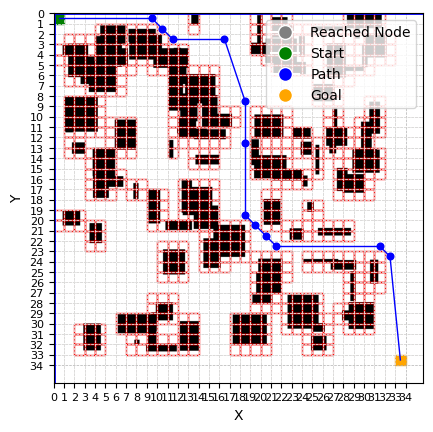

In [17]:
from genetic.genetic import genetic
from genetic.genetic import convert_path_to_xy
G = map.get_grid_matrix()
cols = G.shape[1]
start_time = time.time()
mean_path_value, mean_smooth_value, mean_fit_value, best_path = genetic(map, start=initial, end=goal,
                max_generation=10, ant_number=10, 
                p_crossover=1, p_mutation=0.05, verbose=True)
end_time = time.time()
path = convert_path_to_xy(best_path[-1], cols)
print("Elapsed time: ", end_time-start_time)
print("Bends: ", cal_bend(path))
print("Path length: ", cal_path_length(path))
map.draw_path_found(convert_path_to_xy(best_path[-1], cols), initial, goal, [])

In [18]:
# Evaluation for A*
from cal_runtime import cal_runtime
cal_runtime(explorer=explorer)

a_runtime:  0.00878246784210205
b_runtime:  0.0036642956733703613
c_runtime:  0.45657177686691286
